In [1]:
import os, numpy

In [2]:
dist_file = os.path.join('data','distance_data_headers.csv')
print(dist_file)

data\distance_data_headers.csv


In [3]:
#use numpy function genfromtxt to read in the data
help(numpy.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings in Python 3k.  The strings
        in a 

In [4]:
dist = numpy.genfromtxt(fname=dist_file,delimiter =',',dtype = 'unicode')
print(dist)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [5]:
headers = dist[0]
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [6]:
#take a slice of the data that is only the numerical values
data = dist[1:]
print(data)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [7]:
data = data.astype(numpy.float)

In [8]:
#array_name[row,col]
print(data[2,1])

9.0066


In [9]:
#What will be the output of this code? Write a print statement to check
element1 = data[0,1]
element2 = data[1,0]
print(element1,element2)

8.9542 2.0


In [10]:
#new_array = array_name(start:end,start:end)
small_data = data[0:10,0:3]
print(small_data)

[[ 1.      8.9542  5.8024]
 [ 2.      8.6181  6.0942]
 [ 3.      9.0066  6.0637]
 [ 4.      9.2002  6.0227]
 [ 5.      9.1294  5.9365]
 [ 6.      9.0462  6.2553]
 [ 7.      8.8657  5.9186]
 [ 8.      9.3256  6.2351]
 [ 9.      9.4184  6.1993]
 [10.      9.06    6.0478]]


In [11]:
#what are these slices?
array1 = small_data[5,:]
array2 = small_data[:,1:]
print(array2)

[[8.9542 5.8024]
 [8.6181 6.0942]
 [9.0066 6.0637]
 [9.2002 6.0227]
 [9.1294 5.9365]
 [9.0462 6.2553]
 [8.8657 5.9186]
 [9.3256 6.2351]
 [9.4184 6.1993]
 [9.06   6.0478]]


In [12]:
thr4_atp = data[:,1]
average = numpy.mean(thr4_atp)
print(average)

10.876950930000001


In [13]:
#range for loop: range(start,end)

In [14]:
#Using commands you already know, calculate the number of columns
#num_columns = len(headers)
num_cols = len(data[0,:])
print(num_cols)

5


In [15]:
for num in range(1,num_cols):
    column = data[:,num]
    avg_col = numpy.mean(column)
    print(F'{headers[num]}:{avg_col:.3f}')

THR4_ATP:10.877
THR4_ASP:7.342
TYR6_ATP:11.210
TYR6_ASP:10.993


## Markdown
Creating plots using matplotlib

In [16]:
import matplotlib.pyplot as plt

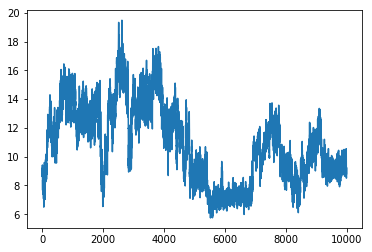

In [17]:
plt.figure()
plt.plot(data[:,1])

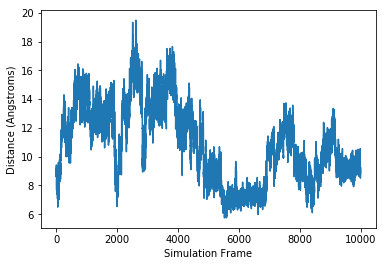

In [18]:
#adding labels
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (Angstroms)')
plt.plot(data[:,1])

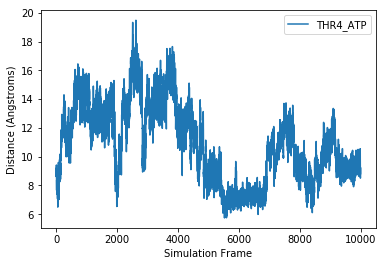

In [19]:
#Pull out the name of the first column of data and save as variable name sample
sample = headers[1]

#adding labels
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (Angstroms)')
plt.plot(data[:,1],label=sample)
plt.legend()

#save the figure
plt.savefig(F'{sample}_highquality.png',dpi=300)

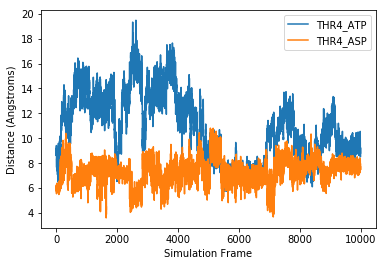

In [20]:
#plot two sets of data on same graph
sample = headers[1]
sample2 = headers[2]

#adding labels
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (Angstroms)')
plt.plot(data[:,1],label=sample)
plt.plot(data[:,2],label=sample2)
plt.legend()


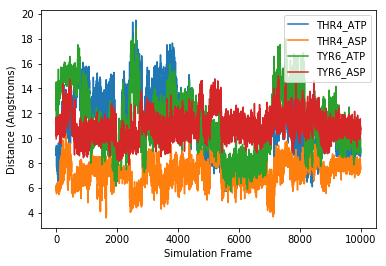

In [21]:
plt.figure()

for col in range(1,num_cols):
    sample = headers[col] 
    plt.plot(data[:,col],label=sample)
    
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (Angstroms)')
plt.legend()

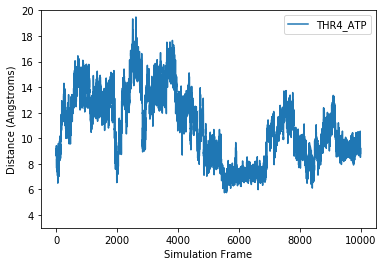

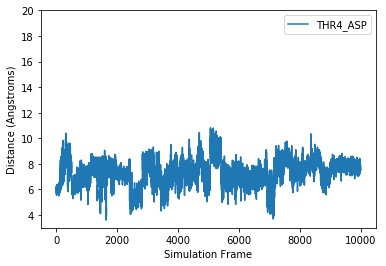

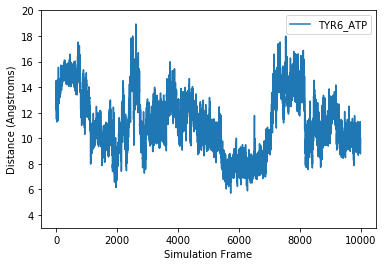

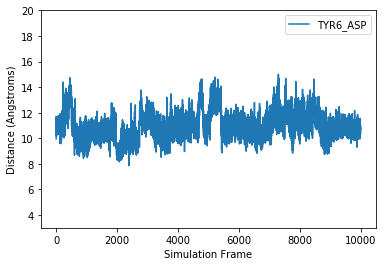

In [22]:
#exercise - modify your for loop to create a separate plot for each column

for col in range(1,num_cols):
    plt.figure()
   
    sample = headers[col] 
    plt.plot(data[:,col],label=sample)
    plt.xlabel('Simulation Frame')
    plt.ylabel('Distance (Angstroms)')
    plt.ylim(3,20)
    plt.legend()
    


In [23]:
small_data

array([[ 1.    ,  8.9542,  5.8024],
       [ 2.    ,  8.6181,  6.0942],
       [ 3.    ,  9.0066,  6.0637],
       [ 4.    ,  9.2002,  6.0227],
       [ 5.    ,  9.1294,  5.9365],
       [ 6.    ,  9.0462,  6.2553],
       [ 7.    ,  8.8657,  5.9186],
       [ 8.    ,  9.3256,  6.2351],
       [ 9.    ,  9.4184,  6.1993],
       [10.    ,  9.06  ,  6.0478]])

In [24]:
#new slicing syntax, last number gets every i'th value
#array[start:stop:interval
small_data[::2]

array([[1.    , 8.9542, 5.8024],
       [3.    , 9.0066, 6.0637],
       [5.    , 9.1294, 5.9365],
       [7.    , 8.8657, 5.9186],
       [9.    , 9.4184, 6.1993]])

In [25]:
#gets every 10th value from the corresponding columns
x_data = data[0::100,0]
y_data = data[0::100,1]

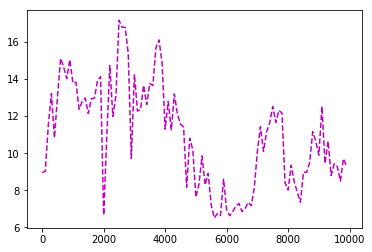

In [26]:
plt.figure()
plt.plot(x_data,y_data,'--m')#dashed,magenta lines

Lots of customization available. Options are well-documented online.

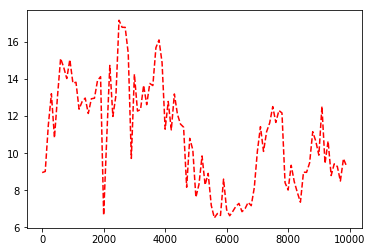

In [27]:
plt.figure()
plt.plot(x_data,y_data,'--',color='red') #built in colors, can also use hex values